In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import os     
print(os.getcwd())
import warnings
warnings.filterwarnings('ignore')

/content


In [ ]:
# Uploading dataset

data= pd.read_excel('/content/drive/MyDrive/PDS_CIA/bank_churn-1.xlsx')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2.0,NaN,1,1,1,NaN,1
1,2,15647311,Hill,608.0,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,NaN,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


# Glimpse of dataset

In [ ]:
# Shape of dataset
data.shape

(10000, 14)

In [ ]:
# columns of dataset
list(data.columns)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [ ]:
#information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9888 non-null   float64
 4   Geography        10000 non-null  object 
 5   Gender           9999 non-null   object 
 6   Age              9601 non-null   object 
 7   Tenure           9999 non-null   float64
 8   Balance          9689 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9538 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 1.1+ MB


In [ ]:
# Describing dataset
data.describe()

,RowNumber,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,9888.000000,9999.000000,9689.000000,10000.000000,10000.00000,10000.000000,9538.000000,10000.000000
mean,5000.50000,1.569094e+07,650.498180,5.012501,76394.943067,1.530200,0.70550,0.515100,100032.987436,0.203800
std,2886.89568,7.193619e+04,96.743002,2.892165,62416.822805,0.581654,0.45584,0.499797,57413.301547,0.402842
min,1.00000,1.556570e+07,350.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,583.750000,3.000000,0.000000,1.000000,0.00000,0.000000,51114.120000,0.000000
50%,5000.50000,1.569074e+07,652.000000,5.000000,97072.420000,1.000000,1.00000,1.000000,100129.330000,0.000000
75%,7500.25000,1.575323e+07,718.000000,7.000000,127609.590000,2.000000,1.00000,1.000000,149193.682500,0.000000
max,10000.00000,1.581569e+07,850.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Cleaning the dataset

In [ ]:
data['Age'].replace(' ',np.NaN,inplace=True)
data['Age'].replace('       ',np.NaN,inplace=True)
data['Gender'].replace(' ',np.NaN,inplace=True)
data['Gender'].replace('  ',np.NaN,inplace=True)

In [ ]:
# missing values
data.isnull().sum() 

RowNumber            0
CustomerId           0
Surname              0
CreditScore        112
Geography            0
Gender             127
Age                406
Tenure               1
Balance            311
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    462
Exited               0
dtype: int64

In [ ]:
# missing value treatment

#categorical
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

#numerical
data['CreditScore'].fillna(data['CreditScore'].mean(),inplace=True)
data['Balance'].fillna(data['Balance'].mean(),inplace=True)
data['EstimatedSalary'].fillna(data['EstimatedSalary'].mean(),inplace=True)
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Tenure'].fillna(data['Tenure'].mean(),inplace=True)


Missing values have been replaced with mean and mode. For categorical features, they have been replaced with mode and for numerical features with mean.

In [ ]:
# missing values after treatment
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Binning

In [ ]:
# binning for age
bins = [0, 30, 45,60,100]
labels = ['0-30', '31-45','46-60','60+']
data['Age_group'] = pd.cut(data['Age'], bins, labels = labels,include_lowest = True)

In [ ]:
# binning for tenure
bins = [0, 2, 4,6,8,10]
labels = ['0-2', '3-4','5-6','6-8','9-10']
data['Tenure_group'] = pd.cut(data['Tenure'], bins, labels = labels,include_lowest = True)

# Outliers

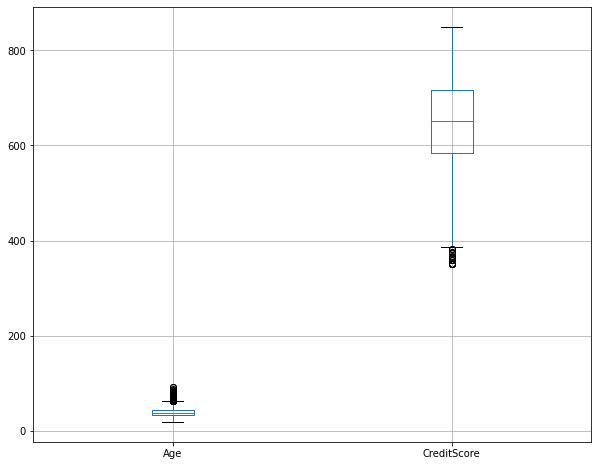

In [ ]:
#outliers

#var=['CreditScore','Age','Balance','EstimatedSalary']

var=['Age','CreditScore']

data[var].boxplot(figsize=(10,8))

In [ ]:
for i in var:
    q75,q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25 - (iqr * 2)
    max = q75 + (iqr * 2)
    print('Feature name : ',i)S
    print('Minimum value : ',min)
    print('Median :',np.median(data[i]))
    print('Maximum value : ',max)
    print('Outliers in {v}--->{x}'.format(v=i,x=(data.loc[data.loc[:,i] < min,i].count() + data.loc[data.loc[:,i]> max,i].count())))

Feature name :  Age
Minimum value :  8.0
Median : 38.0
Maximum value :  68.0
Outliers in Age--->170
Feature name :  CreditScore
Minimum value :  318.0
Median : 651.0
Maximum value :  983.0
Outliers in CreditScore--->0


The box plot analysis shows some outliers but manual observation shows that are no outliers. And in banking it's a natural phenomenon to observe some outliers. We term them as business outliers or natural outliers.

In [ ]:
# plt.figure(figsize=(10,5))
# sns.countplot(x =data['Geography'],hue=data['Exited'])  

In [ ]:
france=data[data['Geography']=='France']
france_chrun=france[data['Exited']==1]
spain=data[data['Geography']=='Spain']
spain_chrun=spain[data['Exited']==1]
germany=data[data['Geography']=='Germany']
germany_churn=germany[data['Exited']==1]

**EDA**

###  Customer from which country have churned the most?

In [ ]:
 d = {'Geography':['France', 'Spain', 'Germany'], 
        'Churn %':[len(france_chrun)/len(france), len(spain_chrun)/len(spain), len(germany_churn)/len(germany)]} 
  
# Create DataFrame 
df = pd.DataFrame(d) 
  
# Print the output. 
df['Churn %']= df['Churn %']*100
df

,Geography,Churn %
0,France,16.174711
1,Spain,16.673395
2,Germany,32.443204


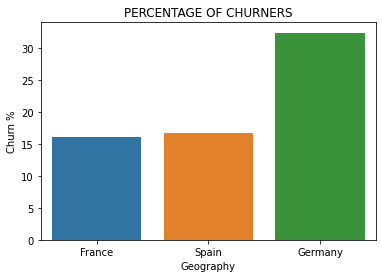

In [ ]:
sns.barplot(x =df['Geography'],y=df['Churn %'])
plt.title("PERCENTAGE OF CHURNERS")
plt.show()

Customers from Germany have churned the most with 32.44% followed by  Spain and France with 16.67% and 16.17% repectively.

### Whether there is any significant relationship between gender and churning?

In [ ]:
a=data[data['Exited']==1]

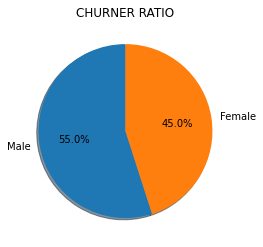

In [ ]:
labels = ["Male","Female"]
values = a['Gender'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("CHURNER RATIO")
plt.show()

No, there is no significant relationship between gender and churner. 

### Whether gender plays a vital role in credit score?

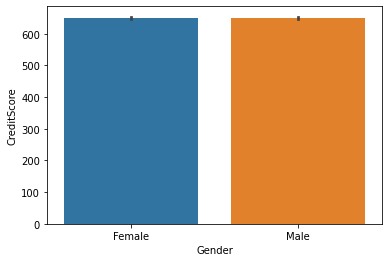

In [ ]:
sns.barplot(x =data['Gender'],y=data['CreditScore'])
plt.title("")
plt.show()

No, credit score is almost same for both genders.

### Which age groups churned out the most?

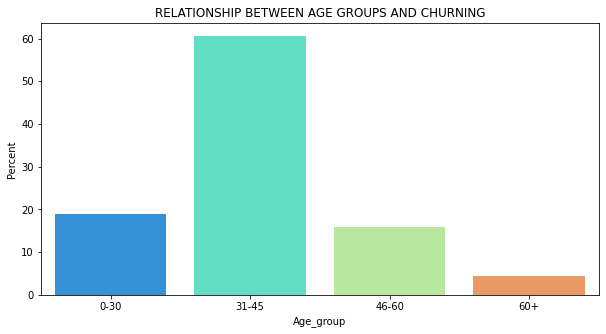

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=data['Age_group'], y=data['Exited'],estimator=lambda x: len(x) / len(data) * 100,palette='rainbow')
ax.set(ylabel="Percent")
plt.title("RELATIONSHIP BETWEEN AGE GROUPS AND CHURNING")
plt.show()

From above graph we can see that the age group of 31-45 churned out the most followed by age group of 0-30, 46-60 and 60+ repectively. We can therefore conclude that customers aged 60 or above doesn't prefer to churn.

###  Which tenure group customers churn out the most?

In [ ]:
data['Tenure_group'].value_counts()

0-2     2496
6-8     2052
3-4     1998
5-6     1980
9-10    1474
Name: Tenure_group, dtype: int64

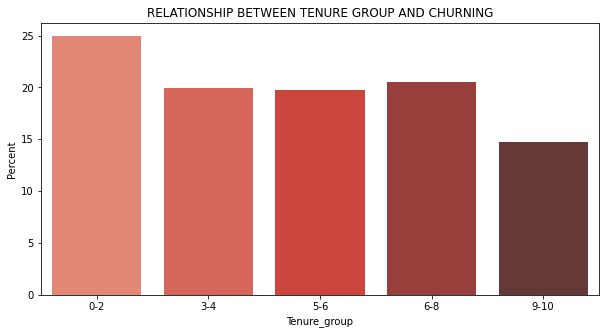

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=data['Tenure_group'], y=data['Exited'],estimator=lambda x: len(x) / len(data) * 100,palette='Reds_d')
ax.set(ylabel="Percent")
plt.title("RELATIONSHIP BETWEEN TENURE GROUP AND CHURNING")
plt.show()

We see that most of the churners are in tenure group of 0-2 years. Customers who are there with the bank for more than 9 years churn out the less.

### Is there any relationship between having credit card and churning?

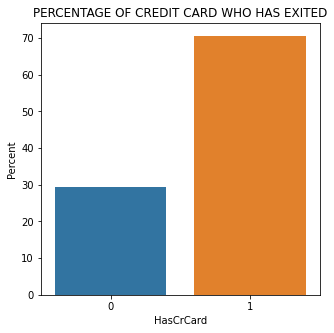

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=data['HasCrCard'], y=data['Exited'],estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")
plt.title("PERCENTAGE OF CREDIT CARD WHO HAS EXITED")
plt.show()

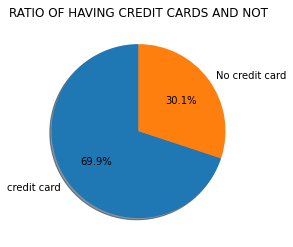

In [ ]:
labels = ["credit card","No credit card"]
values = a['HasCrCard'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.title("RATIO OF HAVING CREDIT CARDS AND NOT")
plt.show()

From our dataset, it is seen that those customers who have credit cards churn out the most with a percentage of 69.9%

### Is there any significant relationship between age group and credit score?

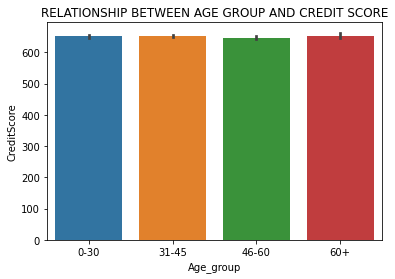

In [ ]:
sns.barplot(x =data['Age_group'],y=data['CreditScore'])
plt.title("RELATIONSHIP BETWEEN AGE GROUP AND CREDIT SCORE")
plt.show()

There is no such relationship between age group and mean credit score. Almost every age group has same mean credit score.

### Is there any direct relationship between balance and churning?

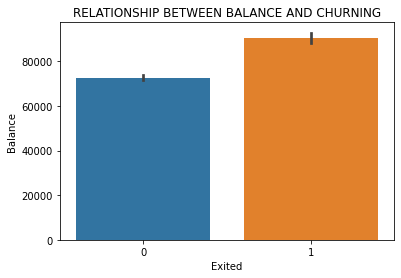

In [ ]:
sns.barplot(x =data['Exited'],y=data['Balance'])
plt.title("RELATIONSHIP BETWEEN BALANCE AND CHURNING")
plt.show()

Customers having more balance churns more than those having less balance.

###  Do active customers churns more than inactive ones?

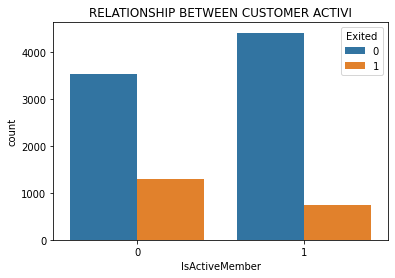

In [ ]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data)
plt.title("RELATIONSHIP BETWEEN CUSTOMER ACTIVI")
plt.show()

Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

### Correlation between variables. *italicized text*

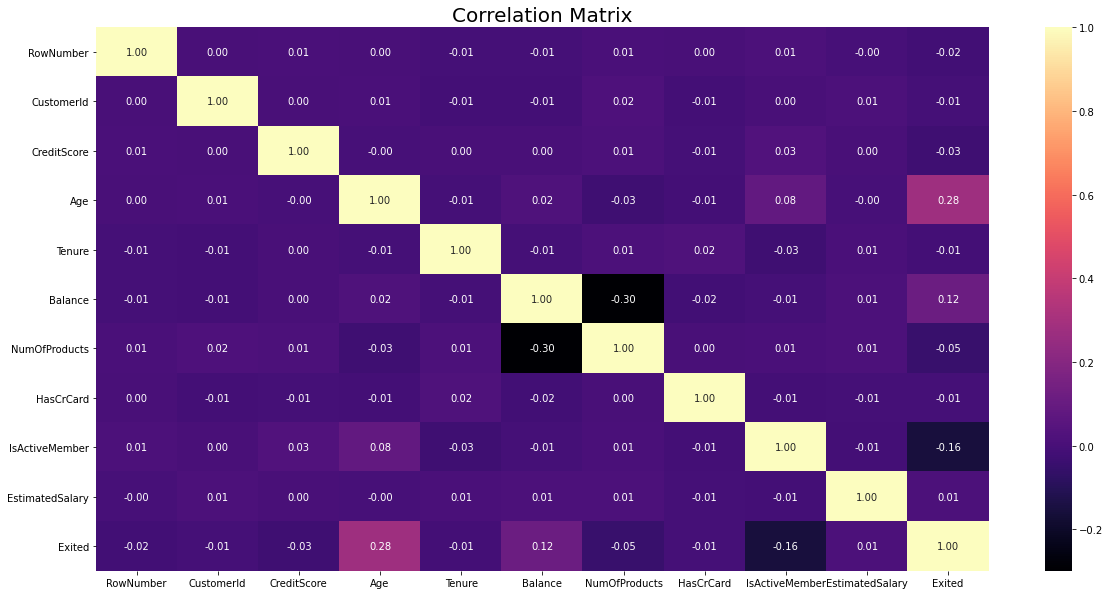

In [ ]:
#sns.heatmap(data)
f, ax = plt.subplots(figsize= [20,10])
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
# Drop the irrelevant columns  
data = data.drop(["RowNumber", "CustomerId", "Surname",'Age','Tenure'], axis = 1)
data.shape

(10000, 11)

In [ ]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Age_group',
       'Tenure_group'],
      dtype='object')

In [ ]:
# feature scaling

v=['CreditScore','Balance','EstimatedSalary','NumOfProducts']
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
data[v] = scaler.fit_transform(data[v])


In [ ]:
data.head()

,CreditScore,Geography,Gender,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_group,Tenure_group
0,0.538,France,Female,0.304486,0.000000,1,1,0.500155,1,31-45,0-2
1,0.516,Spain,Female,0.334031,0.000000,0,1,0.562709,0,31-45,0-2
2,0.304,France,Male,0.636357,0.666667,1,0,0.569654,1,31-45,6-8
3,0.698,France,Female,0.000000,0.333333,0,0,0.469120,0,31-45,0-2
4,1.000,Spain,Female,0.500246,0.000000,1,1,0.395400,0,31-45,0-2


In [ ]:
#one hot encoding for categorical features
data=pd.get_dummies(data,columns=['Geography','Gender','Age_group','Tenure_group'],drop_first=True)
data.head(2)

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Age_group_31-45,Age_group_46-60,Age_group_60+,Tenure_group_3-4,Tenure_group_5-6,Tenure_group_6-8,Tenure_group_9-10
0,0.538,0.304486,0.0,1,1,0.500155,1,0,0,0,1,0,0,0,0,0,0
1,0.516,0.334031,0.0,0,1,0.562709,0,0,1,0,1,0,0,0,0,0,0


In [ ]:
data.dtypes

CreditScore          float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
Age_group_31-45        uint8
Age_group_46-60        uint8
Age_group_60+          uint8
Tenure_group_3-4       uint8
Tenure_group_5-6       uint8
Tenure_group_6-8       uint8
Tenure_group_9-10      uint8
dtype: object

In [ ]:
y=data['Exited']
X=data.drop(['Exited'],axis=1)

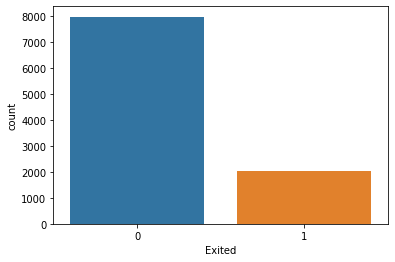

In [ ]:
# since the data is unbalanced, we have to balance it
sns.countplot(x=data['Exited'])


In [ ]:
# RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

In [ ]:
over_sampler =  RandomOverSampler(ratio=0.8)  #oversampling technique
X_new, y_new = over_sampler.fit_sample(X, y)

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

Original dataset shape Counter({0: 7962, 1: 2038})
Resampled dataset shape Counter({0: 7962, 1: 6369})


In [ ]:
#model building
from sklearn.model_selection import cross_val_score

### Will be using K-fold cross validation for model selection 

In [ ]:

# 10-fold cross-validation with Random Forest

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100)
print(cross_val_score(RFC, X_new, y_new, cv=10, scoring='f1').mean())    #f1

0.9455471534344596


# f1 score for Random Forest classifier is 94.55%

In [ ]:
# 10-fold cross-validation with Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
print(cross_val_score(DTC, X_new, y_new, cv=10, scoring='f1').mean())

0.9053536706526231


# f1 score for Decision tree classifier is 90.53%

In [ ]:

# 10-fold cross-validation XGBoost
from xgboost.sklearn import XGBClassifier
XGBC = XGBClassifier(max_depth=3,n_estimator=100,learning_rate=0.5)
print(cross_val_score(XGBC, X_new, y_new, cv=10, scoring='f1').mean())

0.7864479081900686


# f1 score for XGBoost classifier is 78.64%

In [ ]:
# 10-fold cross-validation with Adaboost classifier

from sklearn.ensemble import AdaBoostClassifier
adbc = AdaBoostClassifier(DecisionTreeClassifier(),
    n_estimators=200)
print(cross_val_score(adbc, X_new, y_new, cv=10, scoring='f1').mean())

0.9055292994584512


# f1 score for AdaBoost classifier is 90.55%

In [ ]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X_new, y_new, cv=10, scoring='f1').mean())   #f1

0.6450434453703363


# f1 score for Logistic regression classifier is 64.50%

### Since we have got best f1 score with Random forest classifer then will be moving ahead with RandomForest classiifer


### hyperparameter optimization for random forest classifier/


In [ ]:

parameter={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1500, 1600]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
RFC = RandomForestClassifier()
random_search=RandomizedSearchCV(RFC,param_distributions=parameter,n_iter=5,scoring='f1',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_new,y_new)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
#best parameters
random_search.best_estimator_


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
print(cross_val_score(RFC, X_new, y_new, cv=15, scoring='f1').mean())    #f1

0.955617609267321


In [ ]:
 #After hyperparameter optimization there's not much difference in model performance

Random forerest :- 94.54%

After hyperparameter optimization :- 95.56%


In this project for performance matrix F1 score has been used instead of accuracy because the dataset is imbalanced and for imbalanced dataset f1 score can be trusted more than accuracy.